# 图像处理+180776+胡欣毅(Python版)

## 1. 题目清单（100/100）
1. 熟悉图像处理软件、平台，实现图像的读取与显示（例）
2. 图像像素级读写：求横坐标为25的所有像素三个通道像素值之和；（10/100）
3. 利用公式将RGB图像转化为灰度图，并显示；（20/100）
4. 对题目3得到的灰度图像进行二值化，给定上界A与下界B，在[A, B]内的像素值设置为255，反之为0；（20/100）
5. 图像顺时针旋转30度，并显示；（30/100）
6. 在图像中心截取像素为256*256的子图，并显示；（20/100）

## 2. 解答 

### 2.1 第一问(例)

In [1]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline 

读取并显示图像：

In [2]:
im = cv2.imread('../4.2.03.tiff')
im.shape

(512, 512, 3)

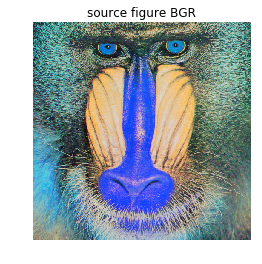

In [3]:
plt.imshow(im)
plt.axis("off")#去除坐标轴
plt.title('source figure BGR')
plt.show()

opencv默认的imread是以BGR的方式进行存储的,而matplotlib的imshow默认则是以RGB格式展示,所以此处我们必须对图片的通道进行转换

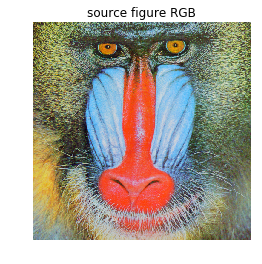

In [4]:
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis("off")
plt.title('source figure RGB')
plt.show()

### 2.2 第二题（10%）

In [5]:
################################################################################
# TODO:                                                                        #
# 图像索引：求横坐标为25的所有像素三个通道像素值之和.                                  #
################################################################################
Pixel_sum = im[25,...].sum()
Pixel_sum
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

175965

### 2.3 第三题（20%）

In [6]:
################################################################################
# TODO:                                                                        #
# 利用公式将RGB图像转化为灰度图，并显示;                                            #
# Hint: Gray=R×0.299+G×0.587+B×0.114                                           #
################################################################################
im_gray = np.zeros_like(im)
im_gray = np.dot (im[...,:], np.array([0.299, 0.587,  0.114]) )

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [7]:
im_gray

array([[145.18 ,  55.83 ,  48.806, ..., 112.588, 153.463, 177.329],
       [116.323, 101.066,  39.612, ..., 129.83 , 148.589, 125.322],
       [ 76.573, 113.978,  46.111, ..., 100.133,  88.208,  81.25 ],
       ...,
       [140.725, 145.449, 140.972, ...,  82.581,  89.481,  78.019],
       [156.029, 140.834, 131.173, ...,  78.887,  79.908,  68.995],
       [ 10.516,  11.288,  13.462, ...,   6.761,   3.533,   4.359]])

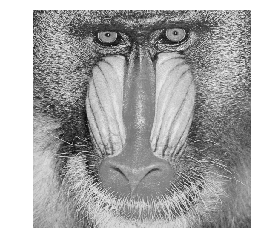

In [8]:
cv2.imwrite('im_gray.png',im_gray)
plt.imshow(im_gray , cmap= 'gray')
plt.axis("off")
plt.show()

Results:保存为'im_gray.png'图片

### 2.4 第四题（20%）

In [9]:
################################################################################
# TODO:                                                                        #
# 对题目3得到的灰度图像进行二值化，给定上界A与下界B，在[A, B]内的像素值设置为255，反之为0  #
################################################################################
def setAB(A,B,image = []):
    image = np.array((image >= A) * (image <=B) , dtype='int') *255
    return image

im_Binarization = setAB(A = 50,B = 100,image = im_gray)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [10]:
im_Binarization

array([[  0, 255,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0]])

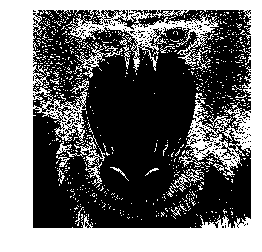

In [11]:
cv2.imwrite('im_Binarization.png',im_Binarization)
plt.imshow(im_Binarization,cmap= 'gray')
plt.axis("off")
plt.show()


Results:保存为'im_Binarization.png'图片

### 2.5 第五题（30%）

[[  0.64951905  -0.375      185.72312247]
 [  0.375        0.64951905  -6.27687753]]


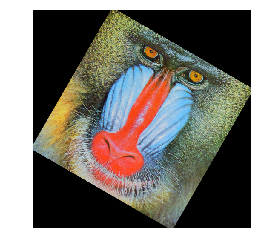

In [12]:
################################################################################
# TODO:                                                                        #
# 图像顺时针旋转30度，并显示                                                       #
################################################################################
def rotate(image, angle, center=None, scale=1.0):
    ##　h,w 尺寸
    (h, w) = image.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
 
    M = cv2.getRotationMatrix2D(center, angle, scale)
    print(M) ## 旋转阵　＋　旋转中心
    # 旋转
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

im_rotate  = rotate(im, -30,scale = 0.75) 
cv2.imwrite('im_rotate.png',im_rotate)
plt.imshow(im_rotate, cmap= 'gray')
plt.axis("off")
plt.show()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Results:

### 2.6 第六题（20%）

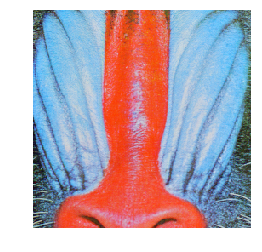

In [13]:
################################################################################
# TODO:                                                                        #
# 在图像中心截取像素为256*256的子图，并显示                                          #
################################################################################
im_child = im[128:384 ,128:384 , :]
cv2.imwrite('im_child.png',im_child)
plt.imshow(im_child, cmap= 'gray')
plt.axis("off")
plt.show()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Results:保存为'im_child.png'图片

In [14]:
im_rotate.shape

(512, 512, 3)

# 图像处理+180776+胡欣毅(C++版)

## 2. 解答 

[c++](c++/hxy.cpp)